# Importing Libraries and data

In [8]:
# import the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

import time
import datetime as dt
from seaborn import palettes


import warnings
warnings.filterwarnings("ignore")

In [9]:
# We will use haverseine to calculate the distance using the longitudinal and lattitue data.
!pip install haversine
from haversine import haversine

In [10]:
df = pd.read_csv("N:\\Summer_Intern\\Capl_PROJECT\\Datasets\\train.csv")

In [11]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [12]:
nyc_df = df.copy()

# Performing Exploratory Data Analysis

In [13]:
#Printing the head of the data
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [14]:
#printing the tail of the data
nyc_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [19]:
#shape of the data (dimensions)
shape = nyc_df.shape
print('the dataset contains',shape[0], 'rows and' ,shape[1], 'columns.')

the dataset contains 1458644 rows and 11 columns.


In [20]:
# Check if it contains null values.
nyc_df.isnull()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1458639,False,False,False,False,False,False,False,False,False,False,False
1458640,False,False,False,False,False,False,False,False,False,False,False
1458641,False,False,False,False,False,False,False,False,False,False,False
1458642,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# Printing the sum of null values in each column if it contains null values.
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [22]:
#Unique elements needed for the analysis because duplicate elements affects the accuracy .So, removing the duplicates.
duplicates = nyc_df.duplicated().sum()

if duplicates == 0:
  print('No duplicates exist')
else:
  print(duplicates,'duplicates exist,Remove duplicates')

No duplicates exist


In [23]:
# Revealing information about the data.
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [24]:
# Get some statiscis.
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


***Points to be noted:***
* *id can be dropped - as every ride would have different id it would'nt give any useful insight.*
* *pickup_datetime and dropoff_time need to be changed to datetime format - currently they are in string (object) format.*
* *extract data from datetime values.*
* *duration is given in seconds lets convert it into minutes.*
* *store_and_fwd_flag is a categorical variable that needs to be converted.*
* *vendor_id consists of two values 1 and 2.*
* *passenger_count ranges from 0-9, the difference between the 75th percentile and the max value shows the precense of outliers.*
* *trip_duration_minutes also contains outliers.*

In [26]:
# Change format for pickup_datetime and dropoff_time.
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

In [27]:
# Retrive day and month data.
nyc_df['day'] = nyc_df.pickup_datetime.dt.weekday
nyc_df['month'] = nyc_df.pickup_datetime.dt.month

# Retrive pickup and dropoff hrs.
nyc_df['pickup_hour'] = nyc_df.pickup_datetime.dt.hour
nyc_df['dropoff_hour'] = nyc_df.dropoff_datetime.dt.hour

In [28]:
# Now lets drop pickup_datetime and dropoff_datetime as we have extracted data from it.
nyc_df.drop(['pickup_datetime', 'dropoff_datetime'], inplace=True, axis=1)

In [29]:
# Convert the data from seconds to mins.
nyc_df['trip_duration_minutes']=nyc_df['trip_duration']/60

# Drop duration in seconds.
nyc_df.drop('trip_duration', inplace=True, axis=1)

In [31]:
# Recheck if formats been changed.
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1458644 non-null  object 
 1   vendor_id              1458644 non-null  int64  
 2   passenger_count        1458644 non-null  int64  
 3   pickup_longitude       1458644 non-null  float64
 4   pickup_latitude        1458644 non-null  float64
 5   dropoff_longitude      1458644 non-null  float64
 6   dropoff_latitude       1458644 non-null  float64
 7   store_and_fwd_flag     1458644 non-null  object 
 8   day                    1458644 non-null  int64  
 9   month                  1458644 non-null  int64  
 10  pickup_hour            1458644 non-null  int64  
 11  dropoff_hour           1458644 non-null  int64  
 12  trip_duration_minutes  1458644 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 144.7+ MB


# Understanding the data by using some visualizations

In [32]:
nyc_df['trip_duration_minutes'].describe()

count    1.458644e+06
mean     1.599154e+01
std      8.729053e+01
min      1.666667e-02
25%      6.616667e+00
50%      1.103333e+01
75%      1.791667e+01
max      5.877137e+04
Name: trip_duration_minutes, dtype: float64

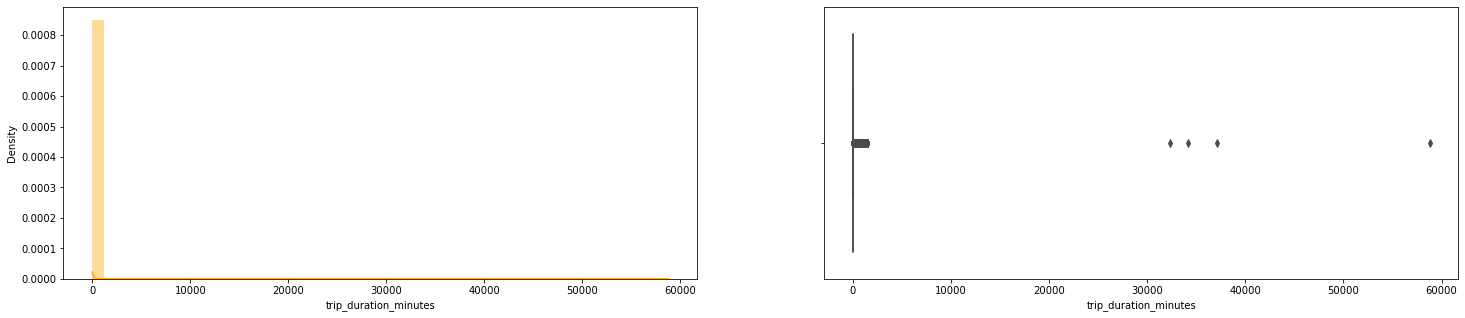

In [33]:
# Check out the trip_duration.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,5))
# plt.figure(figsize=(10,5))
sns.distplot(nyc_df['trip_duration_minutes'], color='orange', ax=ax1)
sns.boxplot(nyc_df['trip_duration_minutes'], color='orange', ax=ax2)
plt.show()

*trip_duration_minutes is positively skewed.*
also it seems there are few extreme values that we will need to check.

In [34]:
nyc_df[nyc_df['trip_duration_minutes'] > 10000]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
355003,id1864733,1,1,-73.789650,40.643559,-73.956810,40.773087,N,1,1,0,11,32328.933333
680594,id0369307,1,2,-73.921677,40.735252,-73.984749,40.759979,N,5,2,22,15,34159.633333
924150,id1325766,1,1,-73.983788,40.742325,-73.985489,40.727676,N,1,1,6,1,37126.866667
978383,id0053347,1,1,-73.783905,40.648632,-73.978271,40.750202,N,5,2,22,18,58771.366667


In [35]:
# Get rid of the extreme values.
nyc_df = nyc_df[nyc_df['trip_duration_minutes'] < 10000]

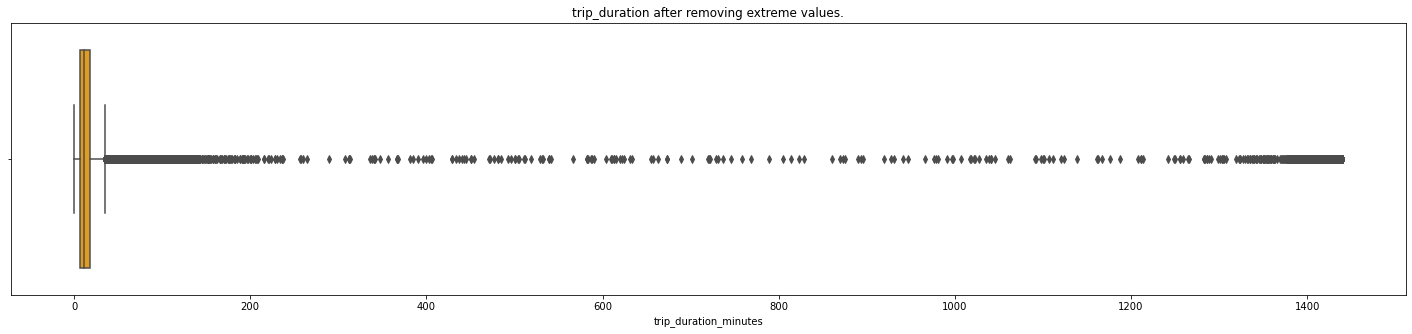

In [36]:
# Now lets check for outliers in the dependent variables.
fig = plt.figure(figsize=(25,5))
sns.boxplot(nyc_df['trip_duration_minutes'], color='orange')
plt.title('trip_duration after removing extreme values.')
plt.show()

there are few values which maybe outliers, this could be bad for our model.
lets look into this ahead in our analysis.

# Independent Variables. 

In [38]:
nyc_df.head(3)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,0,3,17,17,7.583333
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,6,6,0,0,11.050000
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,1,1,11,12,35.400000


In [39]:
independent_variables = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                         'dropoff_latitude', 'store_and_fwd_flag', 'day', 'month', 'pickup_hour', 'dropoff_hour']

*** Vendor_id***

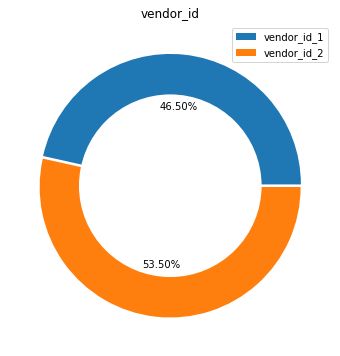

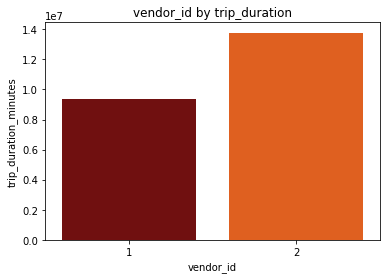

In [55]:
#Understanding vendor_id data
# Calculate the trips done by each vendor.
one = len(nyc_df[nyc_df['vendor_id'] == 1])
two = len(nyc_df[nyc_df['vendor_id'] == 2])
v_id = [one, two]
v_name = ['vendor_id_1', 'vendor_id_2']

# Plot it.
fig = plt.figure(figsize=(6,6))
plt.pie(v_id, autopct='%1.2f%%', explode=(0.01,0.01))
plt.title('vendor_id')
plt.legend(labels=v_name)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

# Groupby trip duration
durationByvendor = nyc_df.groupby('vendor_id', as_index=False)['trip_duration_minutes'].sum()
sns.barplot(data=durationByvendor, x='vendor_id', y='trip_duration_minutes', palette='gist_heat')
plt.title('vendor_id by trip_duration')
plt.show()

***53.50% of the trips are completed by the vendor 2 and 46.50% of the trips are completed by vendor 1.***

***also maximum duration is covered by vendor 2***

*** Passenger count***

In [56]:
#Passenger count
nyc_df['passenger_count'].describe()

count    1.458575e+06
mean     1.664579e+00
std      1.314183e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

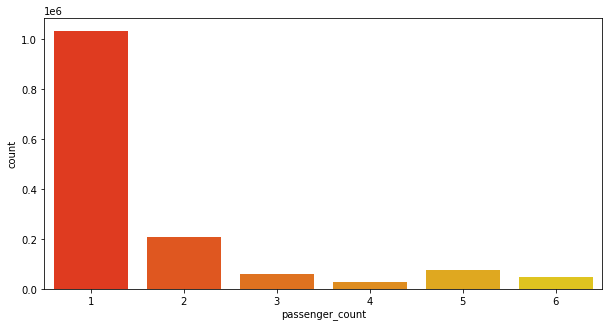

In [57]:
# Passenger count.
plt.figure(figsize=(10,5))
sns.countplot(nyc_df['passenger_count'], palette='autumn')
plt.show()

***some values are zero which mean either the trip was cancled or there was an error in the data entry.***

***7, 8, 9 are extreme cases considering the capacity of a car, so we will get rid of them.***

***most of the trips (75%) contain atmost 1 or 2 passengers.***

In [58]:
#Remove unwanted values from passenger_count.
# Remove the extreme values from passenger_count.
nyc_df = nyc_df[nyc_df['passenger_count'] <= 6]  # This will remove passenger values with 7,8,9 values.

In [59]:
# Remove values which are zero.
nyc_df = nyc_df[nyc_df.passenger_count != 0]

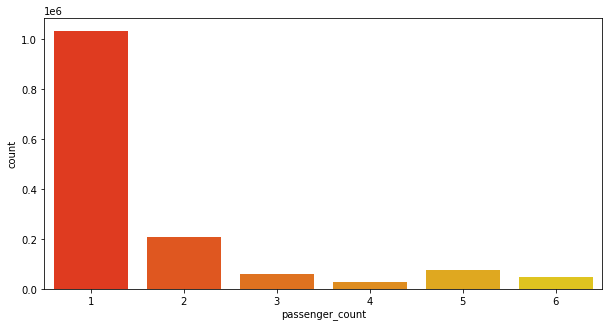

In [60]:
# Plot it.
plt.figure(figsize=(10,5))
sns.countplot(nyc_df['passenger_count'], palette='autumn')
plt.show()

***pickup/dropoff latitude and longitude***


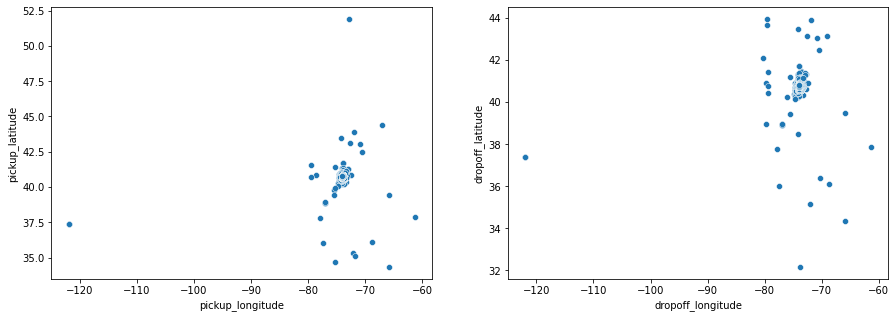

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(nyc_df['pickup_longitude'], nyc_df['pickup_latitude'], ax=ax1)
sns.scatterplot(nyc_df['dropoff_longitude'], nyc_df['dropoff_latitude'], ax=ax2)
plt.show()

***check whats wrong with those extreme values.***

In [62]:
nyc_df[nyc_df['pickup_longitude'] < -120]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
1068810,id3777240,2,2,-121.933235,37.389297,-121.933205,37.389103,N,2,1,18,18,18.416667
1184454,id2854272,2,2,-121.933342,37.389381,-121.933304,37.389511,N,4,2,13,13,8.316667


In [63]:
nyc_df[nyc_df['pickup_latitude'] > 50]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
184925,id2306955,1,1,-72.809669,51.881084,-73.987228,40.750599,N,5,5,18,19,13.2


In [64]:
nyc_df[nyc_df['dropoff_longitude'] < -120]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
1068810,id3777240,2,2,-121.933235,37.389297,-121.933205,37.389103,N,2,1,18,18,18.416667
1184454,id2854272,2,2,-121.933342,37.389381,-121.933304,37.389511,N,4,2,13,13,8.316667


In [65]:
nyc_df[nyc_df['dropoff_latitude'] < 34]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
275644,id0978162,1,4,-75.354332,34.712234,-73.834923,32.181141,N,2,2,16,16,14.583333


***Droping these values.***

In [66]:
nyc_df = nyc_df[nyc_df.id != 'id3777240']
nyc_df = nyc_df[nyc_df.id != 'id2854272']
nyc_df = nyc_df[nyc_df.id != 'id2306955']
nyc_df = nyc_df[nyc_df.id != 'id0978162']

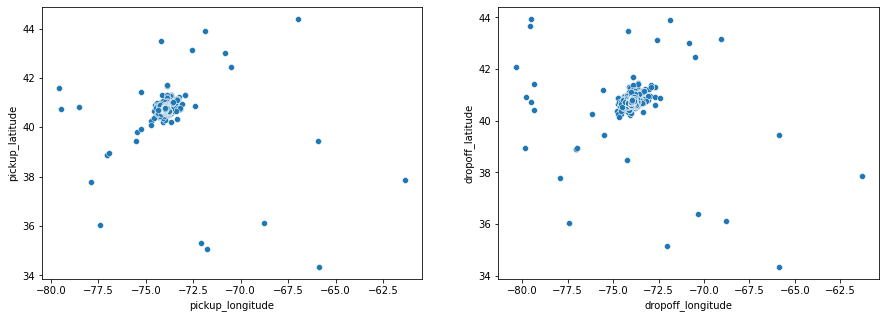

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(nyc_df['pickup_longitude'], nyc_df['pickup_latitude'], ax=ax1)
sns.scatterplot(nyc_df['dropoff_longitude'], nyc_df['dropoff_latitude'], ax=ax2)
plt.show()

***store_and_fwd_flag.***

In [68]:
nyc_df['store_and_fwd_flag'].describe()

count     1458571
unique          2
top             N
freq      1450529
Name: store_and_fwd_flag, dtype: object

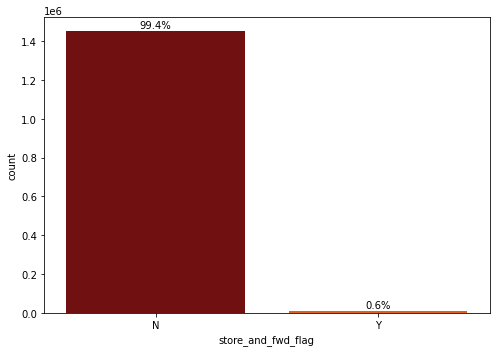

In [69]:
# Plot it.
fig = plt.figure(figsize=(7,5))
plot = sns.countplot(nyc_df['store_and_fwd_flag'], palette='gist_heat')

total = len(nyc_df)
for p in plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

***99.4% of the data values are N and only 0.6% 0f values are Y, which means most of the data was uploaded directly without storing it and forwarding.***

***this ia a categorical feature which we will be converting into numeric by getting dummies.***

***day/month and pickup_hour/dropoff_hour***

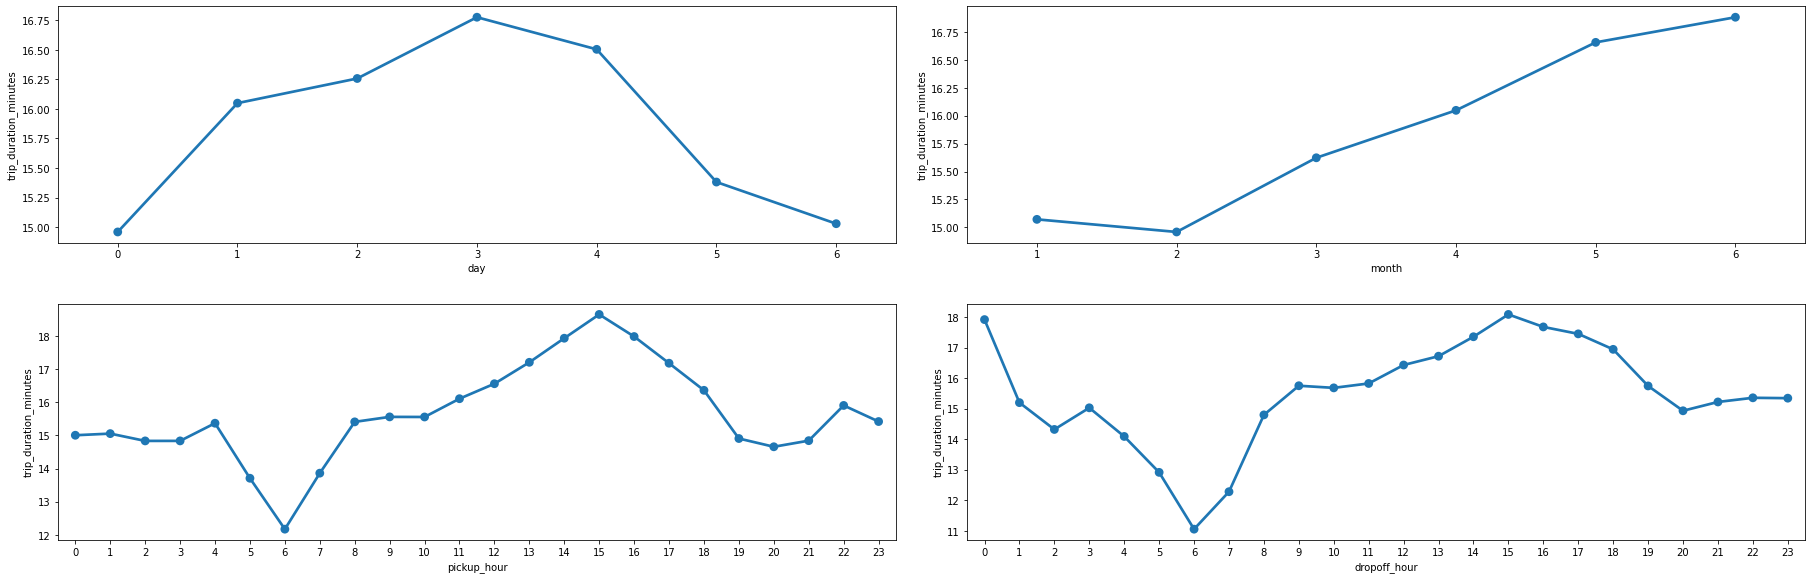

In [70]:
# Now lets get some visuals from the above data.
fig, ax = plt.subplots(2,2, figsize=(25,8))
fig.tight_layout(h_pad=4, w_pad=4)
sns.pointplot(data=nyc_df, x='day', y='trip_duration_minutes', ax=ax[0][0], ci=None)
sns.pointplot(data=nyc_df, x='month', y='trip_duration_minutes', ax=ax[0][1], ci=None)
sns.pointplot(data=nyc_df, x='pickup_hour', y='trip_duration_minutes', ax=ax[1][0], ci=None)
sns.pointplot(data=nyc_df, x='dropoff_hour', y='trip_duration_minutes', ax=ax[1][1], ci=None)
plt.show()

***Trip duration decreases as the weekend approches, it makes sense as most of the people either stay at home or go for vacations.***

***Trip duration increases after Feburary, this might be due to the people returning after holidays.***

***Pickup and dropoff hours are almost the same, most of the comute happen from 6am to 7pm after which it gradually decreases.***

# Data Cleaning And Feature Engineering. 

***Removing outliers from our dependent variable.***

In [71]:
# Create a function that returns upper and lower bounds for removing outliers.
def outlier_treatment(feature):
  sorted(feature)
  Q1,Q3 = np.percentile(feature , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [72]:
# Get upper/lower bounds for trip_duration.
lowerbound,upperbound = outlier_treatment(nyc_df['trip_duration_minutes'])
print(lowerbound,upperbound)

nyc_df[(nyc_df['trip_duration_minutes'] < lowerbound) | (nyc_df['trip_duration_minutes'] > upperbound)]

-10.333333333333336 34.866666666666674


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,1,1,11,12,35.400000
16,id3379579,2,1,-73.991165,40.755562,-73.999290,40.725353,N,0,4,17,18,38.600000
24,id3321406,2,1,-73.955231,40.777134,-73.788750,40.641472,N,4,6,8,8,41.416667
29,id1410897,1,1,-73.982117,40.756351,-73.865692,40.770988,N,2,3,14,14,38.850000
33,id0023813,1,1,-73.990311,40.756580,-73.870918,40.773930,N,6,4,14,15,37.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458571,id1440046,1,2,-73.778946,40.647343,-73.952103,40.781166,N,6,6,22,23,40.900000
1458584,id1607338,2,1,-73.786697,40.641628,-73.996880,40.732506,N,1,6,20,21,38.916667
1458589,id2071901,1,2,-73.782280,40.644783,-73.904305,40.738285,N,4,6,16,17,34.883333
1458600,id0995846,2,2,-73.789543,40.647099,-73.960320,40.798180,N,0,5,17,18,63.683333


In [73]:
nyc_df.drop(nyc_df[ (nyc_df['trip_duration_minutes'] > upperbound) | (nyc_df['trip_duration_minutes'] < lowerbound) ].index , inplace=True)

***Lets calculate distance travelled using pickup and dropoff data.***

In [75]:
# Function to calculate distance using the haversine function as we are provided with gps data.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [76]:
# Get distances.
nyc_df['distance'] = nyc_df.apply(lambda x: calc_distance(x), axis = 1)

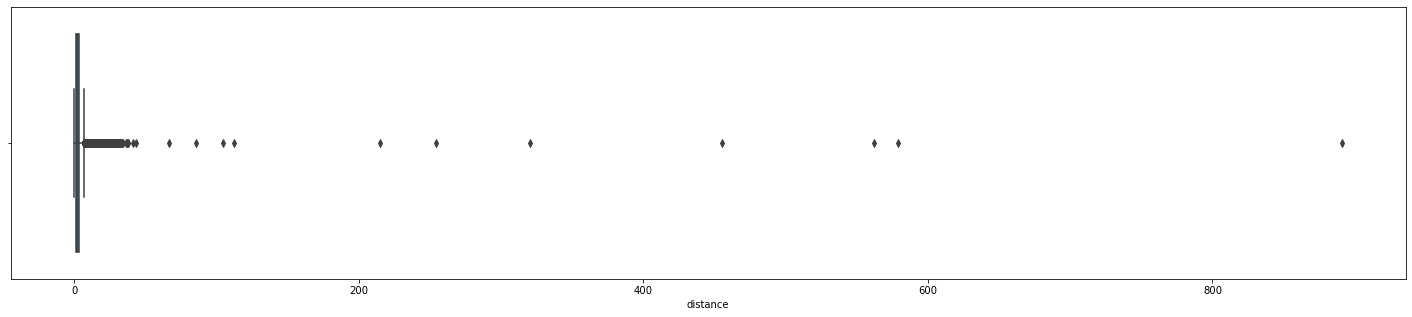

In [77]:
# Get plots.
fig = plt.figure(figsize=(25,5))
sns.boxplot(nyc_df['distance'])
plt.show()

***Many Outliers present ***

In [78]:
# Get upper/lower bounds for trip_duration.
lowerbound,upperbound = outlier_treatment(nyc_df['distance'])
print(lowerbound,upperbound)

nyc_df[(nyc_df['distance'] < lowerbound) | (nyc_df['distance'] > upperbound)]

-2.2334430601876 6.91793444139979


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,month,pickup_hour,dropoff_hour,trip_duration_minutes,distance
45,id0718344,2,1,-74.016327,40.704990,-73.982109,40.773750,N,0,6,15,16,24.633333,8.171214
50,id2067879,2,1,-73.996819,40.752861,-73.809006,40.816875,N,1,1,23,23,25.950000,17.340841
54,id0526266,2,1,-73.934883,40.801010,-73.983002,40.722569,N,6,5,9,9,13.650000,9.617850
67,id3913101,1,2,-74.001411,40.761433,-73.924629,40.864029,N,5,6,22,22,16.716667,13.111154
86,id0283075,1,1,-73.782478,40.644646,-73.981125,40.720886,N,2,4,23,0,29.700000,18.773512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458538,id1302341,1,1,-73.973053,40.793495,-73.872581,40.774479,N,0,2,19,19,25.516667,8.719416
1458546,id2085200,1,1,-73.995178,40.749668,-73.960800,40.688099,N,4,3,4,4,29.850000,7.434015
1458547,id2525150,1,1,-73.978241,40.744911,-73.870483,40.773777,N,1,3,12,13,23.150000,9.626801
1458553,id2796154,1,1,-73.985817,40.727772,-74.021095,40.628605,N,3,4,3,3,21.500000,11.421131


In [79]:
nyc_df.drop(nyc_df[ (nyc_df['distance'] > upperbound) | (nyc_df['distance'] < lowerbound) ].index , inplace=True)

**Lets check the relation between distance and the dependent variable.**

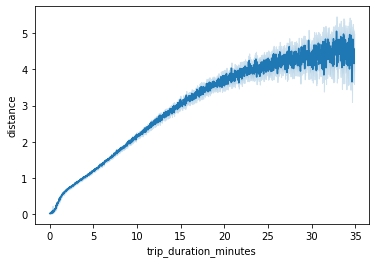

In [80]:
sns.lineplot(nyc_df['trip_duration_minutes'], nyc_df['distance'])
plt.show()

**Get dummies for store_and_fwd_flag, day, month.**

In [81]:
nyc_df = pd.get_dummies(nyc_df, columns=['store_and_fwd_flag'], drop_first=True)
nyc_df = pd.get_dummies(nyc_df, columns=['day', 'month'])

In [82]:
# Check the data.
nyc_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,dropoff_hour,trip_duration_minutes,...,day_3,day_4,day_5,day_6,month_1,month_2,month_3,month_4,month_5,month_6
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,17,17,7.583333,...,0,0,0,0,0,0,1,0,0,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,0,11.050000,...,0,0,0,1,0,0,0,0,0,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,19,19,7.150000,...,0,0,0,0,0,0,0,1,0,0
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,13,13,7.250000,...,0,0,1,0,0,0,1,0,0,0
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,22,22,7.383333,...,0,0,1,0,1,0,0,0,0,0


**Transform pickup/ dropoff hours.**

In [83]:
# Since there are total 24 different values in these two columns it would be better to categorize them and get dummies for them.

# Function to convert pickup/dropoff hours to category.
def timezone(x):
  if x>=(0) and x <(5):
    return 'mid_night'
  elif x>=(5) and x <(12):
    return 'morning'
  elif x>=(12) and x <(16):
    return 'afternoon'
  elif x>=(16) and x <(19):
    return 'evening'
  elif x>=(19) and x <(25):
    return 'night'

In [84]:
# Apply the above function.
nyc_df['pickup_time'] = nyc_df['pickup_hour'].apply(lambda x :timezone(x) )
nyc_df['dropoff_time'] = nyc_df['dropoff_hour'].apply(lambda x :timezone(x) )

In [85]:
nyc_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,dropoff_hour,trip_duration_minutes,...,day_5,day_6,month_1,month_2,month_3,month_4,month_5,month_6,pickup_time,dropoff_time
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,17,17,7.583333,...,0,0,0,0,1,0,0,0,evening,evening
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,0,11.050000,...,0,1,0,0,0,0,0,1,mid_night,mid_night
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,19,19,7.150000,...,0,0,0,0,0,1,0,0,night,night
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,13,13,7.250000,...,1,0,0,0,1,0,0,0,afternoon,afternoon
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,22,22,7.383333,...,1,0,1,0,0,0,0,0,night,night


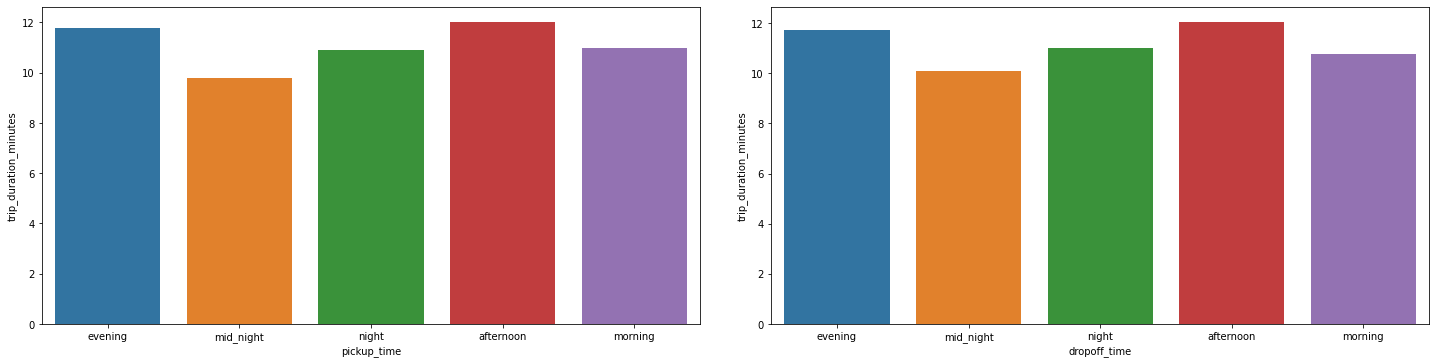

In [86]:
# Plot it.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
fig.tight_layout(h_pad=4, w_pad=4)
sns.barplot(data=nyc_df, x='pickup_time', y='trip_duration_minutes', ax=ax1, ci=None)
sns.barplot(data=nyc_df, x='dropoff_time', y='trip_duration_minutes', ax=ax2, ci=None)
plt.show()

***Most of the pickups and dropoffs happen in the evenings and afternoons, which makes sense as most people comute during these timimgs.***

In [87]:
# Now lets get dummies for these variables.
nyc_df = pd.get_dummies(nyc_df, columns=['pickup_time', 'dropoff_time'])

In [88]:
nyc_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,dropoff_hour,trip_duration_minutes,...,pickup_time_afternoon,pickup_time_evening,pickup_time_mid_night,pickup_time_morning,pickup_time_night,dropoff_time_afternoon,dropoff_time_evening,dropoff_time_mid_night,dropoff_time_morning,dropoff_time_night
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,17,17,7.583333,...,0,1,0,0,0,0,1,0,0,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,0,11.050000,...,0,0,1,0,0,0,0,1,0,0
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,19,19,7.150000,...,0,0,0,0,1,0,0,0,0,1
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,13,13,7.250000,...,1,0,0,0,0,1,0,0,0,0
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,22,22,7.383333,...,0,0,0,0,1,0,0,0,0,1


In [115]:
nyc_df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'dropoff_hour',
       'trip_duration_minutes', 'distance', 'store_and_fwd_flag_Y', 'day_0',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'pickup_time_afternoon', 'pickup_time_evening', 'pickup_time_mid_night',
       'pickup_time_morning', 'pickup_time_night', 'dropoff_time_afternoon',
       'dropoff_time_evening', 'dropoff_time_mid_night',
       'dropoff_time_morning', 'dropoff_time_night'],
      dtype='object')

***Now than we are done with the cleaning as well as the feature engineering of our data***

***lets do some feature selection before proceeding with the model building.***

# Data preparation

In [89]:
# Lets drop id before going further as its not useful.
nyc_df.drop('id', inplace=True, axis=1)

***Split the data first.***

In [90]:
# Get X and y values.
X = nyc_df.drop('trip_duration_minutes', axis=1)

y = nyc_df['trip_duration_minutes']

In [91]:
# Train Test Split.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =5)

In [117]:
y_test

1173920    12.316667
700006      8.850000
1252690    13.266667
1095923    12.850000
196205      4.716667
             ...    
828864     17.983333
1002901    12.350000
1127626    19.300000
819236      7.966667
1060708     8.650000
Name: trip_duration_minutes, Length: 255335, dtype: float64

In [92]:
# scale the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlation between variables

***Correlation of features with the dependent variable.***

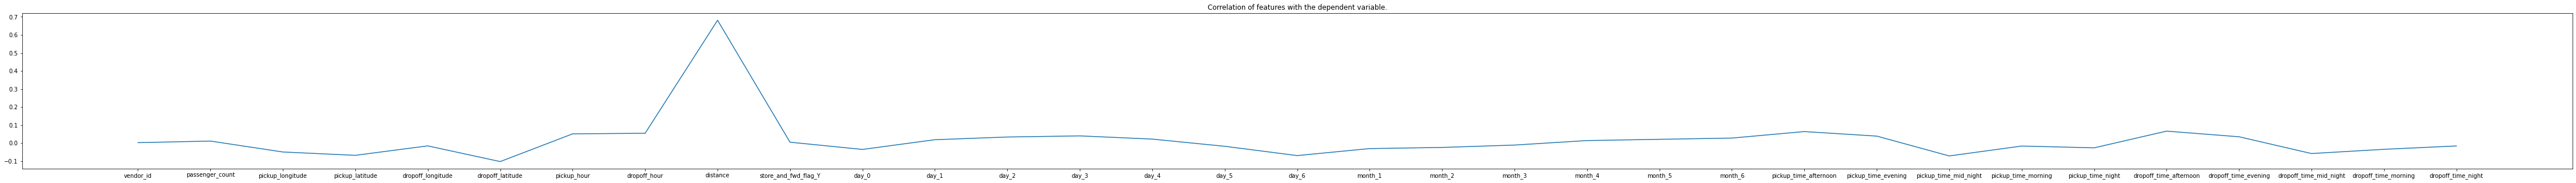

In [93]:
corr_data = X.corrwith(y)
plt.figure(figsize=(80,5))
plt.plot(corr_data)
plt.title('Correlation of features with the dependent variable.')
plt.show()

***Check for multicollinearity among the variables.***

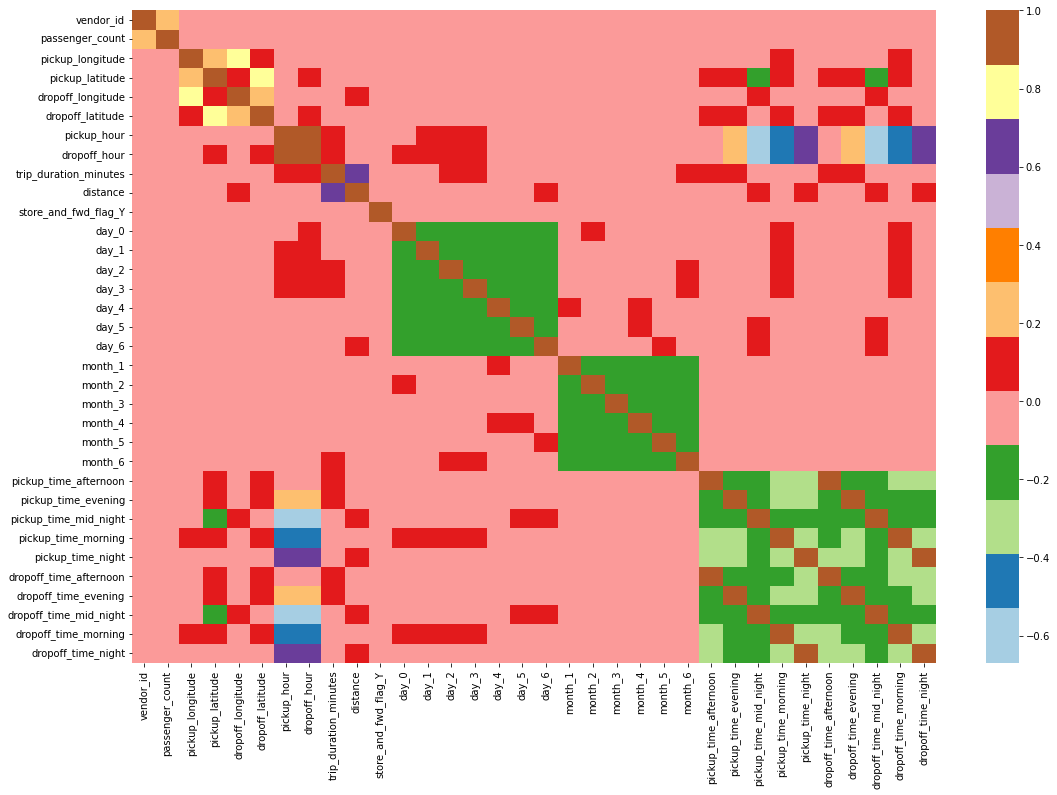

In [94]:
# Multicollinearity.
fig = plt.figure(figsize=(18,12))
sns.heatmap(nyc_df.corr(), cmap='Paired')
plt.show()

***Now that we have completed preparing our data lets build few models using it.***

# Model Selection:
***Models we will be building:***

***Linear Regression***

***Decision Tree Regressor***

***XG Boost Regressor***

***Hist Gradient Boosting Regressor***

In [95]:
# Defining the models to be used.
models = [['Linear Regression', LinearRegression()],
          ['Decision Tree Regressor', DecisionTreeRegressor()],
          ['XG Boost Regressor', xgb.XGBRegressor()],
          ['Hist Gradient Boosting Regressor', HistGradientBoostingRegressor()],
          ]

In [96]:
# Creating a function to train and test models.
model_data = []
for name,current_model in models:
  current_model_data = {}
  current_model.random_state = 78
  current_model_data["Name"] = name
  start = time.time()
  current_model.fit(X_train,y_train)
  end = time.time()
  current_model_data["Train_Time"] = end - start
  current_model_data["Train_R2_Score"] = r2_score(y_train,current_model.predict(X_train))
  current_model_data["Test_R2_Score"] = r2_score(y_test,current_model.predict(X_test))
  current_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,current_model.predict(X_test)))
  model_data.append(current_model_data)

  File "C:\Users\neeli\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\neeli\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\neeli\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\neeli\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [99]:
results_df = df = pd.DataFrame(model_data)
results_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Linear Regression,1.867261,0.527756,0.528715,4.568924
1,Decision Tree Regressor,59.361645,0.999988,0.421184,5.063400
2,XG Boost Regressor,150.177616,0.726159,0.718175,3.533151
3,Hist Gradient Boosting Regressor,20.356043,0.687187,0.686527,3.726254


**The XG Boost Regressor appears to be the best model based on both the highest Test R² Score and the lowest Test RMSE Score.**

# Hyperparameter Tuning: 

***We will tune the parameters of Hist Gradient Boosting Regressor for better results.***

In [100]:
# Maximum depth of trees
max_depth = [6,8,10]

# Learning Rate
learning_rate = [0.2,0.4,0.6]

# Minimum sample leafs.
min_samples_leaf = [50,60]

# Maximum iteration.
max_iter = [400,500]

# Hyperparameter Dict
param_dict = {
              'max_depth' : max_depth,
              'learning_rate' : learning_rate,
              'min_samples_leaf' : min_samples_leaf,
              'max_iter': max_iter
}

In [101]:
# Define model.
# min_samples_leaf = 60, max_iter = 500, learning_rate = 0.2
hbg_reg = HistGradientBoostingRegressor()

# Grid search
hbg_grid = GridSearchCV(estimator=hbg_reg,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')

hbg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=50; total time=  20.5s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=50; total time=  25.2s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=50; total time=  29.5s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=50; total time=  31.2s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=50; total time=  26.4s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=60; total time=  25.2s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=60; total time=  25.2s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=60; total time=  27.9s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=60; total time=  32.4s
[CV] END learning_rate=0.2, max_depth=6, max_iter=400, min_samples_leaf=60; total t

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': [6, 8, 10], 'max_iter': [400, 500],
                         'min_samples_leaf': [50, 60]},
             scoring='r2', verbose=2)

In [102]:
hbg_grid.best_params_

{'learning_rate': 0.4,
 'max_depth': 10,
 'max_iter': 500,
 'min_samples_leaf': 50}

In [103]:
hbg_grid.best_estimator_

HistGradientBoostingRegressor(learning_rate=0.4, max_depth=10, max_iter=500,
                              min_samples_leaf=50)

In [104]:
hgb_optimal_model = hbg_grid.best_estimator_

In [105]:
# Making predictions on train and test data
train_class_preds = hgb_optimal_model.predict(X_train)
test_class_preds = hgb_optimal_model.predict(X_test)

In [106]:
#Train set metrics
hgb_MSE_train  = mean_squared_error((y_train), (train_class_preds))
print("MSE :" , hgb_MSE_train)

hgb_RMSE_train = np.sqrt(hgb_MSE_train)

print("RMSE :" ,hgb_RMSE_train)

hgb_r2_train = r2_score((y_train), (train_class_preds))
print("R2 :" ,hgb_r2_train)
hgb_ar2_train = 1-(1-r2_score((y_train), (train_class_preds)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 : ",hgb_ar2_train)

MSE : 10.472286541486406
RMSE : 3.2360912443079237
R2 : 0.7619787163051017
Adjusted R2 :  0.7619710254412132


In [107]:
#Test set metrics
hgb_MSE_test  = mean_squared_error((y_test), (test_class_preds))
print("MSE :" , hgb_MSE_test)

hgb_RMSE_test = np.sqrt(hgb_MSE_test)

print("RMSE :" ,hgb_RMSE_test)

hgb_r2_test = r2_score((y_test), (test_class_preds))
print("R2 :" ,hgb_r2_test)
hgb_ar2_test = 1-(1-r2_score((y_test), (test_class_preds)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",hgb_ar2_test)

MSE : 11.33181636382775
RMSE : 3.3662763350366456
R2 : 0.7441677777905255
Adjusted R2 :  0.744134709125174


***We can observe improvement in the R2 and RMSE after hyperparameter tuning.***

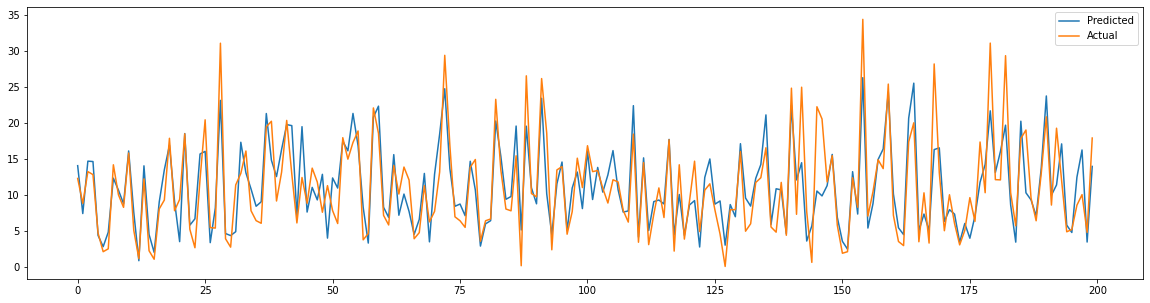

In [108]:
 plt.figure(figsize=(20,5))
plt.plot((test_class_preds)[:200])
plt.plot(np.array(y_test)[:200])
plt.legend(["Predicted","Actual"])
plt.show()

***Since the data is very large we will consider the first 200 values to compare the actual and predicted trip_durations.***

***As we can see the model has done a pretty good job in predicting the durations.***

***Before HyperParameter TuningThe XG Boost Regressor appears to be the best model based on both the highest Test R² Score and the lowest Test RMSE Score.***

***Hence,After Tuning it would be safe to say that Hist Gradient Boosting Regressor can be used for future predictions.***